In [1]:
import h5py
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
from mpl_toolkits.axes_grid1 import ImageGrid
plt.style.use('~/Python_Tool/ryan_mplstyle.mplstyle')

from scipy.stats import skew

In [2]:
Ro = 0.1
Bu = 8

Ly_instab = 8
Ly = Ly_instab*4
Ny = 256
Lx = Ly*2
Nx = Ny*2

In [3]:
# snapname = '2LaySW_sp_%.2f_%.3f_%d' %(Ly_instab,Ro,Nx)
# snapname = snapname.replace(".", "d" ); 
# sp_int = 2
# snapname = ''+snapname+'/'+snapname+'_s%d.h5' %sp_int

# with h5py.File(snapname, mode='r') as file:
    
#     # SW_h1_data = np.squeeze(np.array(file['tasks']['h1']))*Ro/Bu
#     # SW_h2_data = np.squeeze(np.array(file['tasks']['h2']))*Ro/Bu
    
#     SW_zeta_1_data = np.squeeze(np.array(file['tasks']['zeta_1']))*Ro
#     SW_zeta_2_data = np.squeeze(np.array(file['tasks']['zeta_2']))*Ro
    
#     SW_div_1_data = np.squeeze(np.array(file['tasks']['div_1']))*Ro
#     SW_div_2_data = np.squeeze(np.array(file['tasks']['div_2']))*Ro
    
#     SW_sim_time_ary = np.array(file['scales']['sim_time'])
#     # print(sim_time_ary)
    
#     x = np.array(file['scales'][list(file['scales'])[-2]])
#     y = np.array(file['scales'][list(file['scales'])[-1]])

3e-10
0.995185187076705
1.990157253088349
3.005689800283569
4.000994281093773
4.996234230657486
5.991599299047265
7.007084301766208
8.002200338281535
8.997347059452942
9.992508876464344
11.00794614577327
12.00257548675906
12.996583963122093
13.989878360092124
15.002565004628329
15.994177447837155
17.00500515378545
17.993962698416897
19.000861239599185
20.004413109083053
21.002792147637493
21.99309891151101
23.009571222730102
24.004571604691296
25.003037087099237
26.004082800704513
27.00561260319851
27.999085324382797
28.99887453168081
29.998266785042436
31.00224844261076
31.997327911165346
33.00044848131313
33.99612297712446
34.996999385515636
35.99824532515157
37.00428115071281
37.99618395800733
38.99942063673649
39.997119045120144
41.00295055763803
42.003233153846196
43.0018371691326
44.002224425810574
44.99746455508503
46.003431973668
47.004344016933146
48.00025243950891
49.000694203177986
49.99641929206284
50.998415326807844
51.997957190062934
53.00133510393216
53.9977462112259
55.

KeyboardInterrupt: 

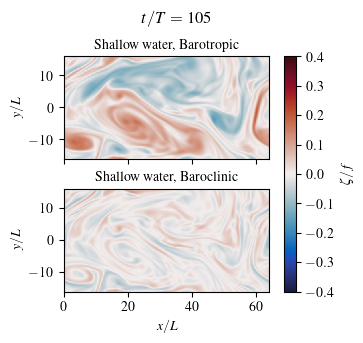

In [21]:
for sp_int in [1,2,3]:
    snapname = '2LaySW_sp_%.2f_%.3f_%d' %(Ly_instab,Ro,Nx)
    snapname = snapname.replace(".", "d" ); 
    # sp_int = 2
    snapname = ''+snapname+'/'+snapname+'_s%d.h5' %sp_int
    
    with h5py.File(snapname, mode='r') as file:
        
        # SW_h1_data = np.squeeze(np.array(file['tasks']['h1']))*Ro/Bu
        # SW_h2_data = np.squeeze(np.array(file['tasks']['h2']))*Ro/Bu
        
        SW_zeta_1_data = np.squeeze(np.array(file['tasks']['zeta_1']))*Ro
        SW_zeta_2_data = np.squeeze(np.array(file['tasks']['zeta_2']))*Ro
        
        SW_div_1_data = np.squeeze(np.array(file['tasks']['div_1']))*Ro
        SW_div_2_data = np.squeeze(np.array(file['tasks']['div_2']))*Ro
        
        SW_sim_time_ary = np.array(file['scales']['sim_time'])
        # print(sim_time_ary)
        
        x = np.array(file['scales'][list(file['scales'])[-2]])
        y = np.array(file['scales'][list(file['scales'])[-1]])


    for SW_time_idx in range(SW_sim_time_ary.size):
    
        print(SW_sim_time_ary[SW_time_idx])
        
        fig = plt.figure(figsize=(3, 7))
        
        grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                         nrows_ncols=(2,1),
                         axes_pad=0.3,
                         share_all=True,
                         cbar_location="right",
                         cbar_mode="single",
                         cbar_size="3%",
                         cbar_pad=0.15,
                         )
        fig.suptitle('$t/T=%.d$' %round(SW_sim_time_ary[SW_time_idx]), y=0.73)
        
        clim = 0.4
        div_ary = [-0.01,-0.005,0.005,0.01]
        
        im0 = grid[0].pcolormesh(x,y,(SW_zeta_1_data[SW_time_idx,:,:].T+SW_zeta_2_data[SW_time_idx,:,:].T)/2, cmap=cmo.balance, vmin=-clim, vmax=clim)
        grid[0].contour(x,y,(SW_div_1_data[SW_time_idx,:,:].T+SW_div_2_data[SW_time_idx,:,:].T)/2, div_ary, colors='black', linewidths=0.5)
        grid[0].set_aspect('equal')
        grid[0].set_xlabel("$x/L$"); grid[0].set_ylabel("$y/L$")
        # grid[0].set_title("Shallow water, Upper, $t/T=%.0f$" %SW_sim_time_ary[SW_time_idx])
        grid[0].set_title("Shallow water, Barotropic")
        
        im1 = grid[1].pcolormesh(x,y,(SW_zeta_1_data[SW_time_idx,:,:].T-SW_zeta_2_data[SW_time_idx,:,:].T)/2, cmap=cmo.balance, vmin=-clim, vmax=clim)
        grid[1].contour(x,y,(SW_div_1_data[SW_time_idx,:,:].T-SW_div_2_data[SW_time_idx,:,:].T)/2, div_ary, colors='black', linewidths=0.5)
        grid[1].set_aspect('equal')
        grid[1].set_xlabel("$x/L$"); grid[1].set_ylabel("$y/L$")
        grid[1].set_title("Shallow water, Baroclinic")
        
        # Colorbar
        cbar = grid[1].cax.colorbar(im1)
        cbar.set_label("$\zeta/f$")
        
        figname = 'figs/video_SW/twolay_zeta_snap_t%.1f' %(SW_sim_time_ary[SW_time_idx])
        figname = figname.replace(".", "d" ); figname = figname+'.png'
        plt.savefig(figname, bbox_inches='tight', dpi=100)
    
        plt.close()

In [22]:
import imageio

images = []

time_ary = np.arange(0,101)

# with imageio.get_writer('figs/SW_movie.gif', mode='I') as writer:

for time in time_ary:
    figname = 'figs/video_SW/twolay_zeta_snap_t%.1f' %(time)
    figname = figname.replace(".", "d" ); figname = figname+'.png'
    
    images.append(imageio.imread(figname))

imageio.mimsave('figs/SW_movie.gif', images)

/state/partition1/job-57421688/ipykernel_2910739/3885238784.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(figname))
